In [120]:
from queue import SimpleQueue

In [121]:
pos = (3, 3)

In [122]:
vertexQueue = SimpleQueue()
vertexQueue.put(pos)
                                    #    - - - 0 1 2 3
                                    #  3 * * * * * * *
horseMoves = ((2, -1), (2, 1),      #  2 * * X * X * *
              (-2, -1), (-2, 1),    #  1 * X * * * X *
              (1, 2), (-1, 2),      #  0 * * * H * * *
              (1, -2), (-1, -2))    # -1 * X * * * X *
                                    # -2 * * X * X * *
                                    # -3 * * * * * * *
gridData = {pos : [None, 0]} # read, parent, l

In [123]:
while not vertexQueue.empty():
    currentVertex = vertexQueue.get()
    for i in horseMoves:
        if(currentVertex[0]+i[0] >= 0 and currentVertex[1]+i[1] >= 0
        and currentVertex[0]+i[0] < 8 and currentVertex[1]+i[1] < 8
        and (currentVertex[0]+i[0], currentVertex[1]+i[1]) not in gridData):
            gridData[(currentVertex[0]+i[0], currentVertex[1]+i[1])] = [currentVertex, gridData[currentVertex][1] + 1]
            vertexQueue.put((currentVertex[0]+i[0], currentVertex[1]+i[1]))

gridData

{(3, 3): [None, 0],
 (5, 2): [(3, 3), 1],
 (5, 4): [(3, 3), 1],
 (1, 2): [(3, 3), 1],
 (1, 4): [(3, 3), 1],
 (4, 5): [(3, 3), 1],
 (2, 5): [(3, 3), 1],
 (4, 1): [(3, 3), 1],
 (2, 1): [(3, 3), 1],
 (7, 1): [(5, 2), 2],
 (7, 3): [(5, 2), 2],
 (3, 1): [(5, 2), 2],
 (6, 4): [(5, 2), 2],
 (4, 4): [(5, 2), 2],
 (6, 0): [(5, 2), 2],
 (4, 0): [(5, 2), 2],
 (7, 5): [(5, 4), 2],
 (3, 5): [(5, 4), 2],
 (6, 6): [(5, 4), 2],
 (4, 6): [(5, 4), 2],
 (6, 2): [(5, 4), 2],
 (4, 2): [(5, 4), 2],
 (2, 4): [(1, 2), 2],
 (0, 4): [(1, 2), 2],
 (2, 0): [(1, 2), 2],
 (0, 0): [(1, 2), 2],
 (2, 6): [(1, 4), 2],
 (0, 6): [(1, 4), 2],
 (2, 2): [(1, 4), 2],
 (0, 2): [(1, 4), 2],
 (5, 7): [(4, 5), 2],
 (3, 7): [(4, 5), 2],
 (5, 3): [(4, 5), 2],
 (1, 7): [(2, 5), 2],
 (1, 3): [(2, 5), 2],
 (5, 0): [(7, 1), 3],
 (6, 3): [(7, 1), 3],
 (6, 5): [(7, 3), 3],
 (6, 1): [(7, 3), 3],
 (1, 0): [(3, 1), 3],
 (4, 3): [(3, 1), 3],
 (2, 3): [(3, 1), 3],
 (7, 6): [(6, 4), 3],
 (5, 6): [(6, 4), 3],
 (7, 2): [(6, 4), 3],
 (3, 6): [(4

In [124]:
import numpy as np
def getTreeLevels(treeData : dict):
    depth = max(treeData.items(), key = lambda x : x[1][1])[1][1]
    levels = []
    for i in range(depth + 1):
        x = []
        y = []
        for j in treeData.items():
            if j[1][1] == i:
                x.append(j[0][0])
                y.append(j[0][1])
        levels.append((np.array(x), np.array(y)))
    return(levels)

BFSlevels = getTreeLevels(gridData)
BFSlevels

[(array([3]), array([3])),
 (array([5, 5, 1, 1, 4, 2, 4, 2]), array([2, 4, 2, 4, 5, 5, 1, 1])),
 (array([7, 7, 3, 6, 4, 6, 4, 7, 3, 6, 4, 6, 4, 2, 0, 2, 0, 2, 0, 2, 0, 5,
         3, 5, 1, 1]),
  array([1, 3, 1, 4, 4, 0, 0, 5, 5, 6, 6, 2, 2, 4, 4, 0, 0, 6, 6, 2, 2, 7,
         7, 3, 7, 3])),
 (array([5, 6, 6, 6, 1, 4, 2, 7, 5, 7, 3, 3, 6, 1, 4, 2, 7, 3, 7, 3, 0, 0,
         0, 0]),
  array([0, 3, 5, 1, 0, 3, 3, 6, 6, 2, 6, 2, 7, 6, 7, 7, 4, 4, 0, 0, 3, 5,
         1, 7])),
 (array([5, 5, 7, 1, 1]), array([5, 1, 7, 5, 1]))]

In [125]:
def getHexFromGradientRgb(iColor,  eColor, gradient):
    return "#{:02x}{:02x}{:02x}".format(int(iColor[0]*(1. - gradient) + eColor[0]*gradient), 
                                        int(iColor[1]*(1. - gradient) + eColor[1]*gradient),
                                        int(iColor[2]*(1. - gradient) + eColor[2]*gradient))

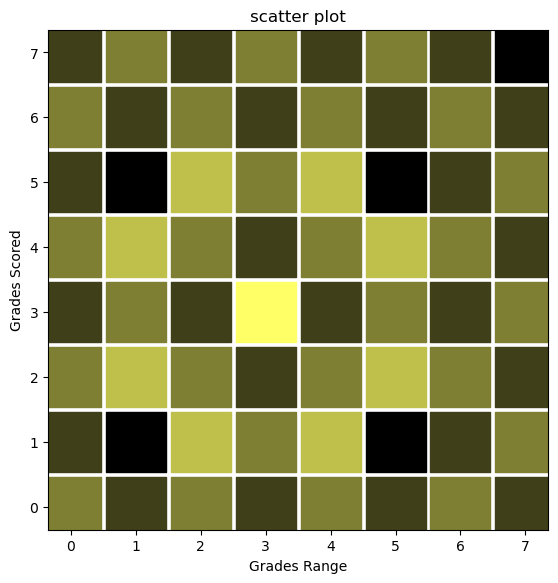

In [126]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
ax=fig.add_axes([0,0,1,1])
BFSDepth = len(BFSlevels)
for i in range(BFSDepth):
    ax.scatter(BFSlevels[i][0], BFSlevels[i][1], s = 1900, marker = ',',
               color=getHexFromGradientRgb((255, 255, 102), (0, 0, 0), i/(BFSDepth-1.)))
ax.set_xlabel('Grades Range')
ax.set_ylabel('Grades Scored')
ax.set_title('scatter plot')
plt.show()